In [95]:
import IPython
from IPython.display import Image, Audio, Video
#import music21
#from music21 import converter, corpus, instrument, note, stream, chord, duration
import music21 as ms
from midi2audio import FluidSynth
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import sys
from sklearn.model_selection import train_test_split
import warnings
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
import seaborn as sns

Referências:<br/>
https://web.mit.edu/music21/doc/usersGuide/usersGuide_15_key.html<br/>
https://www.kaggle.com/code/karnikakapoor/music-generation-lstm#LOADING-DATA

## Introdução ao pacote music21

In [2]:
ms.environment.set('musescoreDirectPNGPath', 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe')
ms.environment.UserSettings()['lilypondPath'] = 'C:/Program Files (x86)/LilyPond/usr/bin'

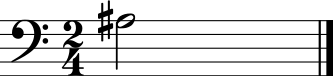

In [3]:
n = ms.note.Note('A#3')
n.duration.type = 'half'
n.show()

In [4]:
n.duration, n.name, n.octave, n.pitch, n.pitch.frequency

(<music21.duration.Duration 2.0>,
 'A#',
 3,
 <music21.pitch.Pitch A#3>,
 233.08188075904488)

In [5]:
n.pitch.accidental, n.pitch.alter, n.pitch.midi

(<music21.pitch.Accidental sharp>, 1.0, 58)

In [6]:
n.myAttribute = "step by step we'll still play Chopin"

In [7]:
print(n.myAttribute)

step by step we'll still play Chopin


In [8]:
r = ms.note.Rest()

In [9]:
r.duration.type = 'half'

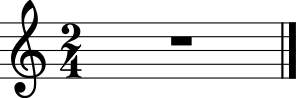

In [10]:
r.show()

In [11]:
p1 = ms.pitch.Pitch('F#5')

In [12]:
print(p1.octave)
print(p1.name)
print(p1.nameWithOctave)
print(p1.accidental)
print(p1.midi)
print(p1.spanish)
print(p1.getEnharmonic())

5
F#
F#5
sharp
78
fa sostenido
G-5


whole


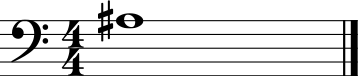

half


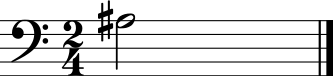

quarter


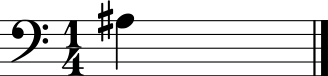

eighth


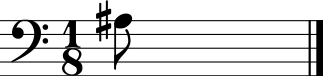

In [13]:
n = ms.note.Note('A#3')
print('whole')
n.duration.type = 'whole'
n.show()

print('half')
n.duration.type = 'half'
n.show()

print('quarter')
n.duration.type = 'quarter'
n.show()

print('eighth')
n.duration.type = 'eighth'
n.show()

eighth


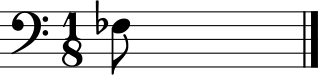

quarter


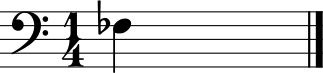

half


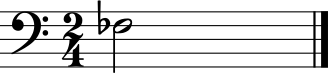

whole


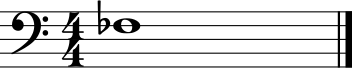

In [14]:
n = ms.note.Note('F-3')
n.duration = ms.duration.Duration(0.5)
print(n.duration.type)
n.show()

n.duration = ms.duration.Duration(1)
print(n.duration.type)
n.show()

n.duration = ms.duration.Duration(2)
print(n.duration.type)
n.show()

n.duration = ms.duration.Duration(4)
print(n.duration.type)
n.show()


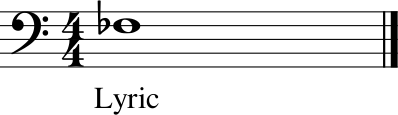

In [15]:
n.addLyric('Lyric')
n.show()

### Notes lists, streams and outputs

In [16]:
n1 = ms.note.Note(nameWithOctave='c3', duration=ms.duration.Duration(1))
n2 = ms.note.Note(nameWithOctave='d#3', duration=ms.duration.Duration(2))
n3 = ms.note.Note(nameWithOctave='g3', duration=ms.duration.Duration(1))
n4 = ms.note.Note(nameWithOctave='a3', duration=ms.duration.Duration(4))
noteList = [n1, n2, n3]
print(noteList)

[<music21.note.Note C>, <music21.note.Note D#>, <music21.note.Note G>]


In [17]:
noteList.append(n4)
for note in noteList:
    print(note.name)

C
D#
G
A


Stream length: 6
{0.0} <music21.note.Note C>
{1.0} <music21.note.Note D#>
{3.0} <music21.note.Note G>
{4.0} <music21.note.Note A>
{8.0} <music21.note.Note A>
{12.0} <music21.note.Note A>


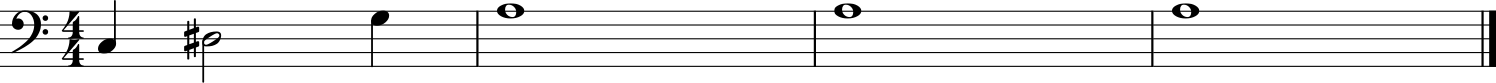

In [19]:
stream1 = ms.stream.Stream()
stream1.append(n1)
stream1.append(n2)
stream1.append(n3)
stream1.repeatAppend(n4, 3)

print('Stream length: {}'.format(len(stream1)))
stream1.show('text')
stream1.show()
stream1.show('midi')

In [20]:
for note in stream1:
    print(note.nameWithOctave)

C3
D#3
G3
A3
A3
A3


Stream length: 6
{0.0} <music21.note.Note G>
{0.0} <music21.note.Note B>
{2.0} <music21.note.Rest half>
{4.0} <music21.note.Note D>
{4.0} <music21.note.Note G>
{6.0} <music21.note.Rest half>


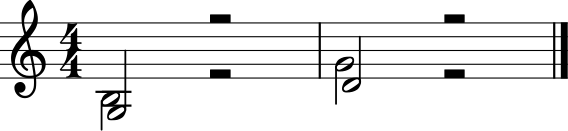

In [22]:
n1 = ms.note.Note(nameWithOctave='g3', duration=ms.duration.Duration(2))
n2 = ms.note.Note(nameWithOctave='b3', duration=ms.duration.Duration(2))
n3 = ms.note.Note(nameWithOctave='d4', duration=ms.duration.Duration(2))
n4 = ms.note.Note(nameWithOctave='g4', duration=ms.duration.Duration(2))
r1 = ms.note.Rest(duration=ms.duration.Duration(2))
r2 = ms.note.Rest(duration=ms.duration.Duration(2))

stream2 = ms.stream.Stream([n1, n2])
stream2.append(r1)
stream2.append([n3, n4])
stream2.append(r2)

stream2[0].offset = 0.0
stream2[1].offset = 0.0
stream2[2].offset = 2.0
stream2[3].offset = 4.0
stream2[4].offset = 4.0
stream2[5].offset = 6.0

print('Stream length: {}'.format(len(stream1)))
stream2.show('text')
stream2.show()
stream2.show('midi')

In [23]:
stream2.analyze('ambitus')

<music21.interval.Interval P8>

In [24]:
stream2.lowestOffset, stream2.highestOffset, stream2.highestTime

(0.0, 6.0, 8.0)

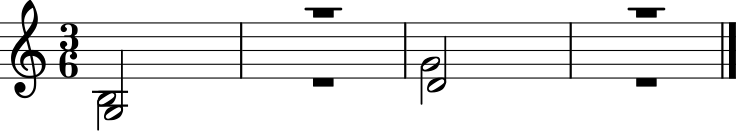

In [25]:
ms.defaults.meterNumerator = 3
ms.defaults.meterDenominatorBeatType = 6
stream2.show()

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C->
        {4.0} <music21.note.Note E#>
    {8.0} <music21.stream.Measure 2 offset=8.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>
{0.0} <music21.stream.Part part2>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E#>


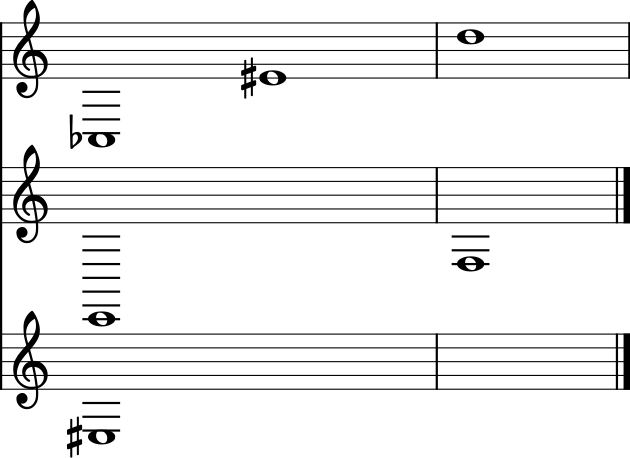

In [26]:
s = ms.stream.Score(id='mainScore')
p0 = ms.stream.Part(id='part0')
p1 = ms.stream.Part(id='part1')
p2 = ms.stream.Part(id='part2')

m01 = ms.stream.Measure(number=1)
m01.append(ms.note.Note('C-3', type="whole"))
m01.append(ms.note.Note('E#4', type="whole"))
m02 = ms.stream.Measure(number=2)
m02.append(ms.note.Note('D5', type="whole"))
p0.append([m01, m02])

m11 = ms.stream.Measure(number=1)
m11.append(ms.note.Note('E2', type="whole"))
m12 = ms.stream.Measure(number=2)
m12.append(ms.note.Note('F3', type="whole"))
p1.append([m11, m12])

m20 = ms.stream.Measure(number=1)
m20.append(ms.note.Note('E#3', type="whole"))
p2.append(m20)

s.insert(0, p0)
s.insert(0, p1)
s.insert(0, p2)
s.show('text')
s.show()
s.show('midi')

In [27]:
for el in s.recurse():
    if isinstance(el, ms.note.Note):
        print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C-> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.note.Note E#> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=8.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E#> <music21.stream.Measure 1 offset=0.0>


In [28]:
print('1st treble clef')
for measure in s[0]:
    for note in measure:
        print('offset:{} - name{}'.format(note.offset, note.nameWithOctave))
        
print('2nd treble clef') #bassclef     
for measure in s[1]:
    for note in measure:
        print('offset:{} - name{}'.format(note.offset, note.nameWithOctave))

1st treble clef
offset:0.0 - nameC-3
offset:4.0 - nameE#4
offset:0.0 - nameD5
2nd treble clef
offset:0.0 - nameE2
offset:0.0 - nameF3


In [29]:
for measure in s:
    print(s.flatten())

<music21.stream.Score mainScore_flat>
<music21.stream.Score mainScore_flat>
<music21.stream.Score mainScore_flat>


### Chords

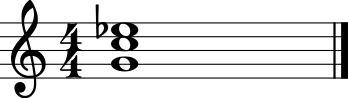

In [30]:
cMinor = ms.chord.Chord(["C5","G4","E-5"])
cMinor.duration = ms.duration.Duration(4)
cMinor.show()

In [31]:
for pitch in cMinor.pitches:
    print(pitch.nameWithOctave)

C5
G4
E-5


In [32]:
cMinor.isMajorTriad(), cMinor.isMinorTriad()

(False, True)

In [33]:
print('is chord?: {}'.format(cMinor.isChord))
print('Common name: {}'.format(cMinor.commonName))
print('Full name: {}'.format(cMinor.fullName))
print('Pitch common name: {}'.format(cMinor.pitchedCommonName))
print('inversion: {}'.format(cMinor.inversion()))
print('chord root: {}'.format(cMinor.root()))
print('chord third: {}'.format(cMinor.third))
print('chord fifth: {}'.format(cMinor.fifth))
print('chord seventh: {}'.format(cMinor.seventh))
print('chord bass: {}'.format(cMinor.bass()))

is chord?: True
Common name: minor triad
Full name: Chord {C in octave 5 | G in octave 4 | E-flat in octave 5} Whole
Pitch common name: C-minor triad
inversion: 2
chord root: C5
chord third: E-5
chord fifth: G4
chord seventh: None
chord bass: G4


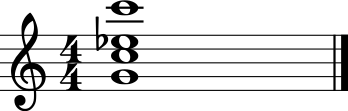

In [34]:
cMinor.add('c6')
cMinor.show()

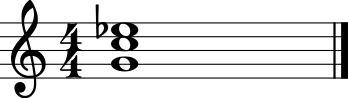

In [35]:
cClosed = cMinor.closedPosition()
cClosed.show()

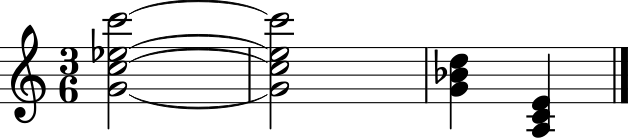

In [37]:
streamC = ms.stream.Stream()
streamC.append(cMinor)
streamC.append(ms.chord.Chord(['g4', 'b-4', 'd5']))
streamC.append(ms.chord.Chord(['a3', 'c4', 'e4']))
streamC.show()

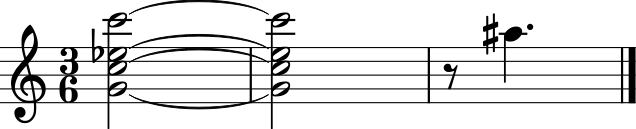

In [38]:
rest1 = ms.note.Rest()
rest1.quarterLength = 0.5
noteASharp = ms.note.Note('A#5')
noteASharp.quarterLength = 1.5

stream2 = ms.stream.Stream()
stream2.append(cMinor)
stream2.append(rest1)
stream2.append(noteASharp)
stream2.show()

Show sheet and midi player


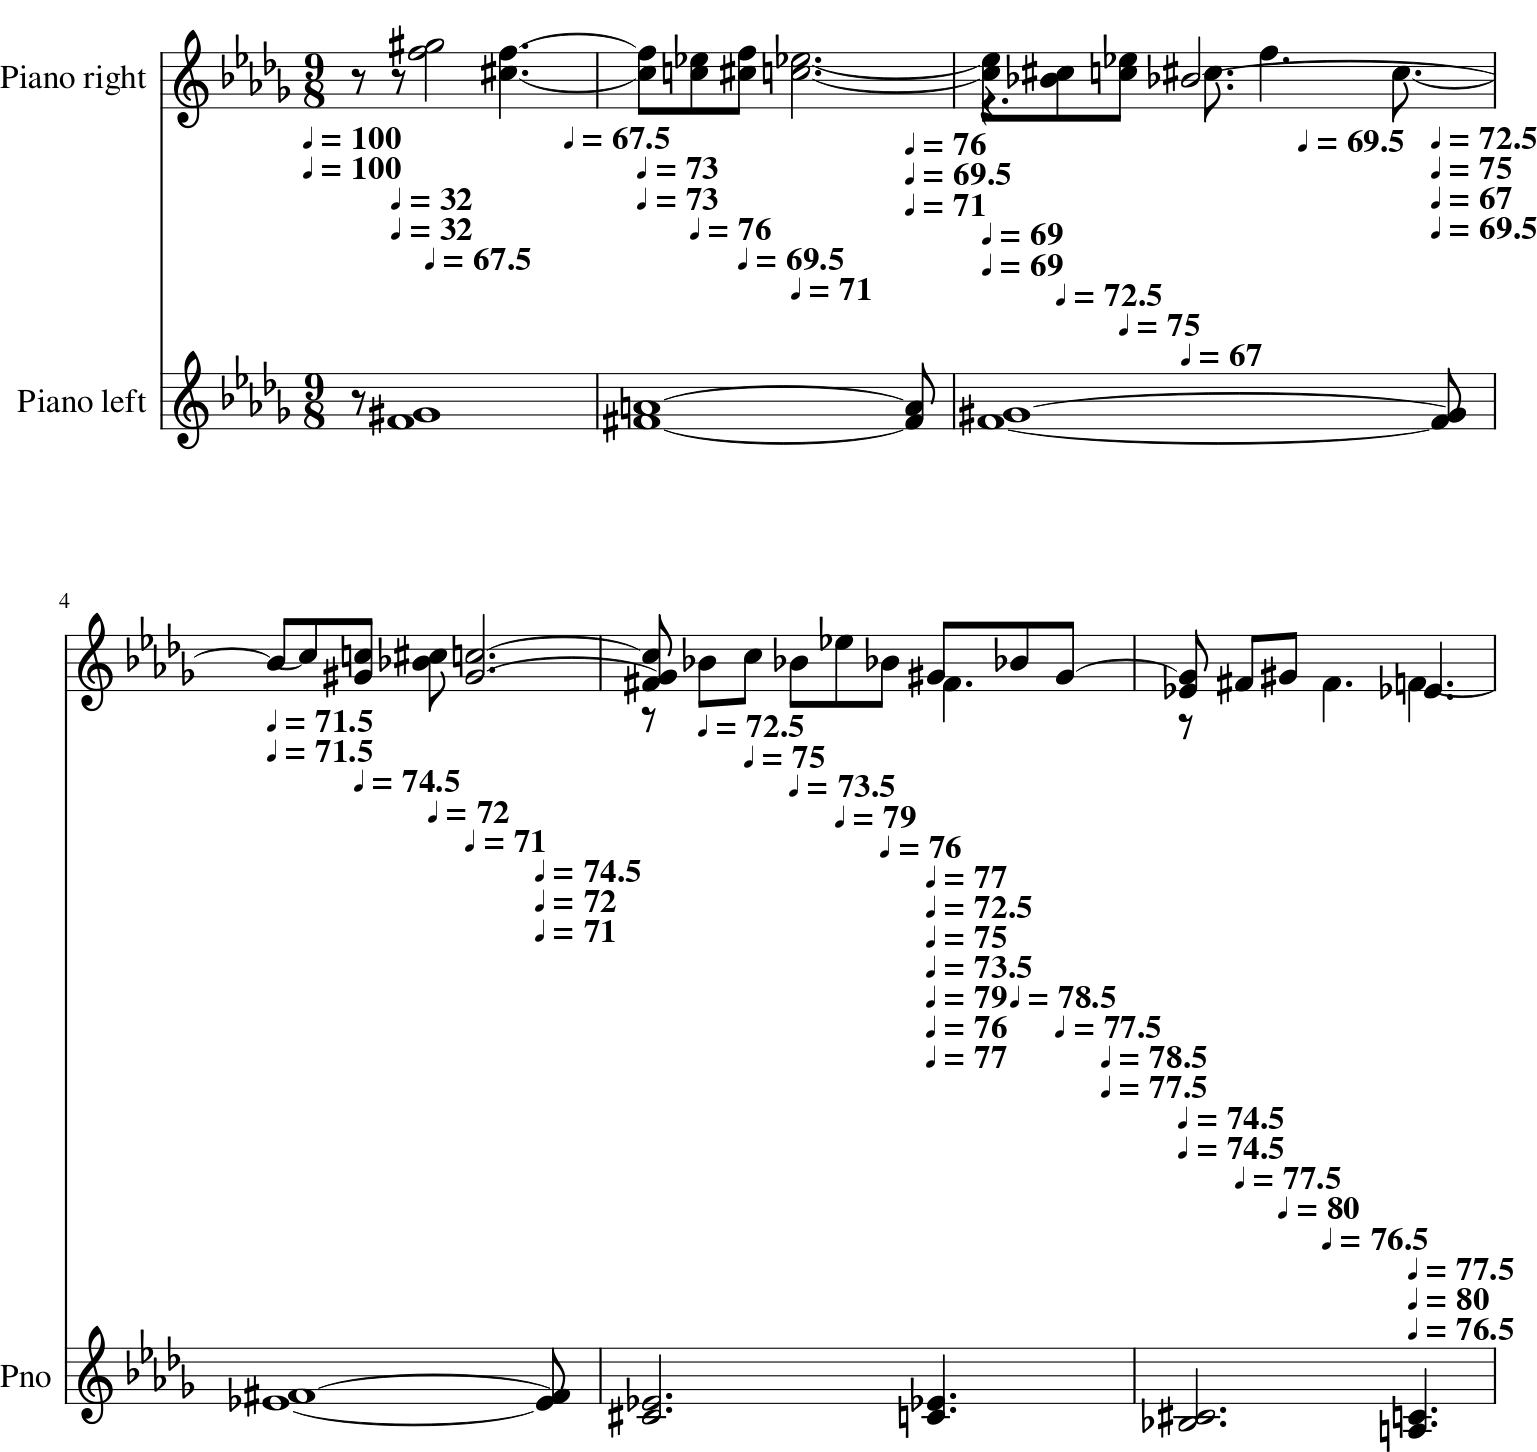

(None, None)

In [40]:
#Load from midi file
song = ms.converter.parse('data/debussy/DEB_CLAI.mid')

score = ms.stream.Stream()
score.append(song)

print('Show sheet and midi player')
song.show(), song.show('midi') 

In [42]:
songTemp = ms.stream.Stream([song[0], song[1]]) #just treble and bass clefs

songTemp.show('text')

{0.0} <music21.stream.Part 0x253124a1bb0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.instrument.Piano 'Piano right: Piano right'>
        {0.0} <music21.instrument.Piano 'Piano'>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark Quarter=100.0>
        {0.0} <music21.key.Key of D- major>
        {0.0} <music21.meter.TimeSignature 9/8>
        {0.0} <music21.note.Rest eighth>
        {0.5} <music21.tempo.MetronomeMark largamente Quarter=32.0>
        {0.5} <music21.note.Rest eighth>
        {1.0} <music21.tempo.MetronomeMark adagietto Quarter=67.5>
        {1.0} <music21.chord.Chord G#5 F5>
        {3.0} <music21.chord.Chord F5 C#5>
    {4.5} <music21.stream.Measure 2 offset=4.5>
        {0.0} <music21.tempo.MetronomeMark andante Quarter=73.0>
        {0.0} <music21.chord.Chord F5 C#5>
        {0.5} <music21.tempo.MetronomeMark Quarter=76.0>
        {0.5} <music21.chord.Chord C5 E-5>
        {1.0} <music21.tempo.MetronomeMark Q

Show sheet and midi player


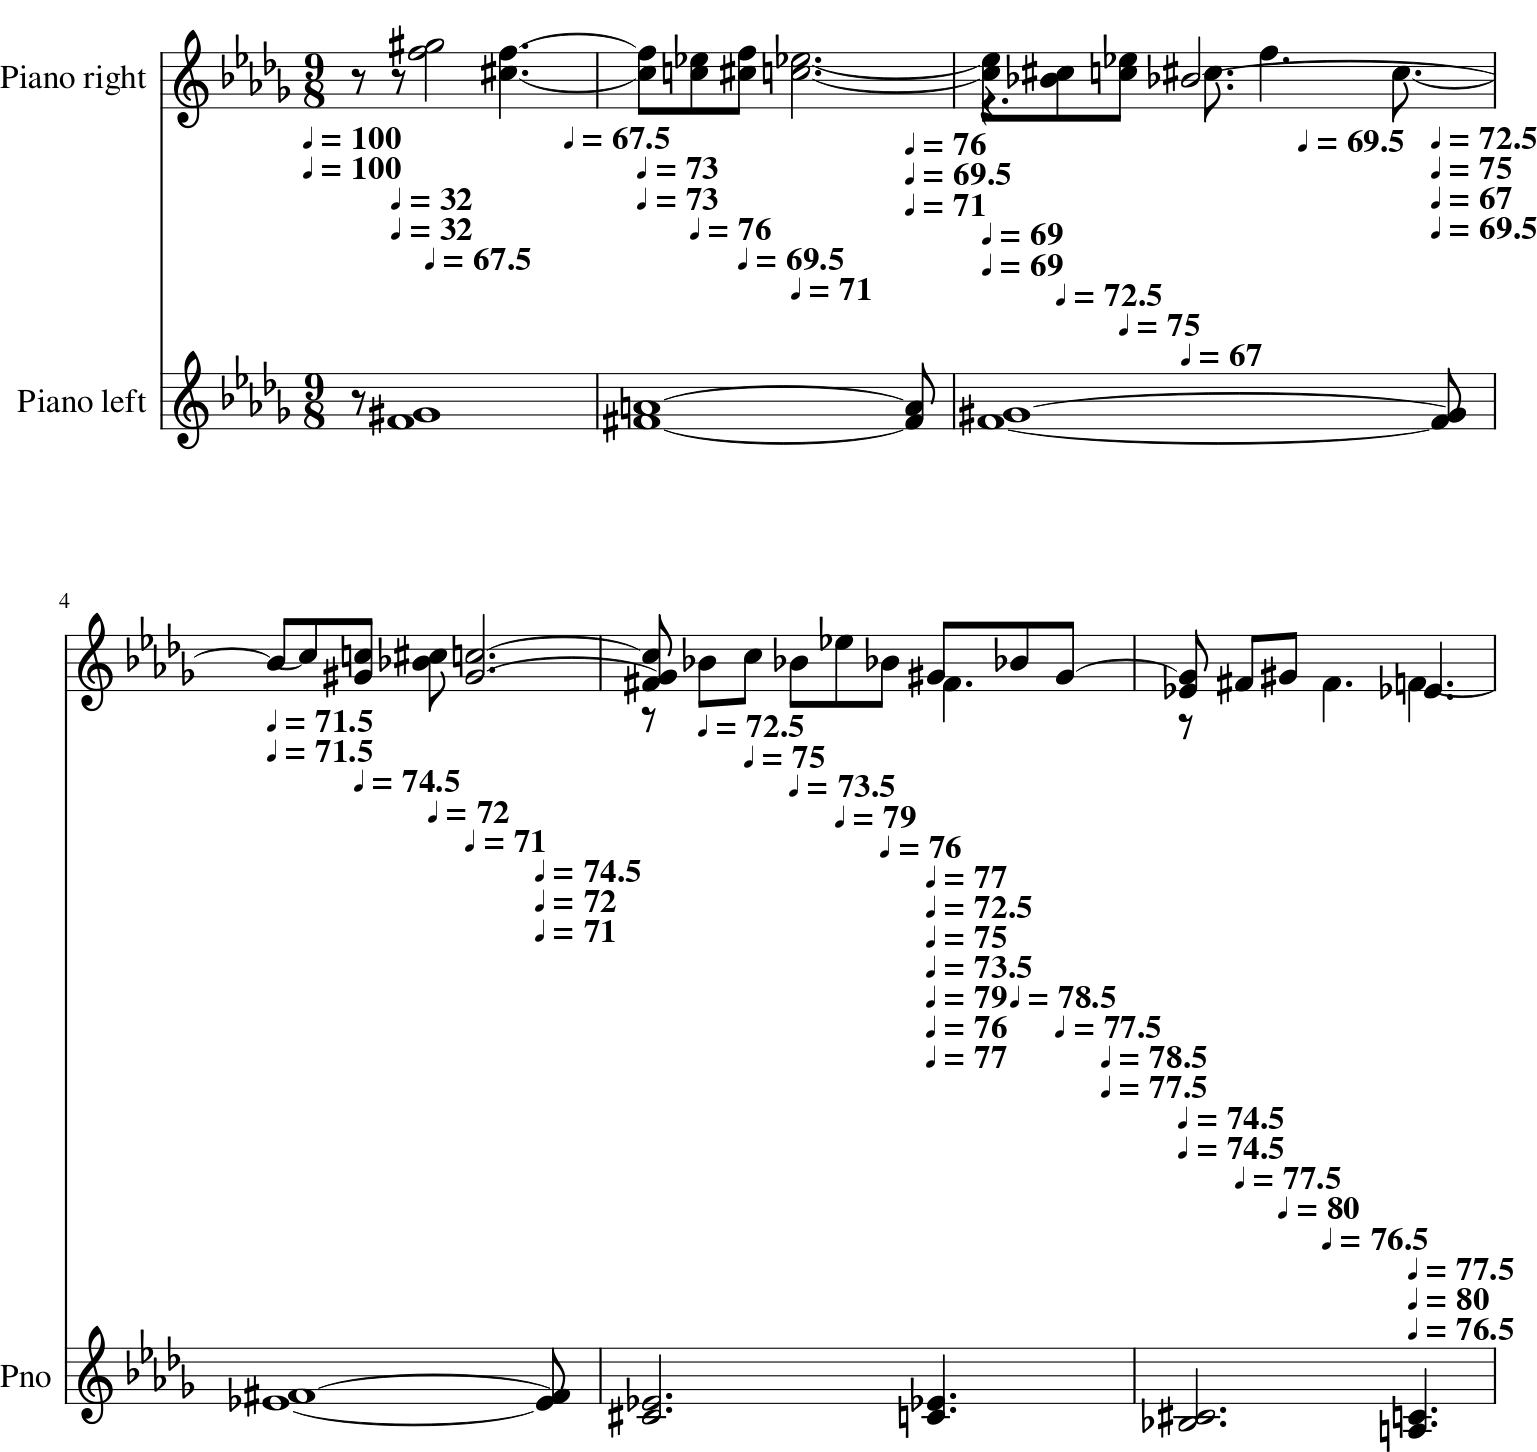

(None, None)

In [45]:
songChordify = song.chordify()
print('Show sheet and midi player')
song.show(), song.show('midi') 

In [ ]:
#Twinkle Twinkle Little Star
littleMelody = converter.parse('tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2')
#Symphony 5 1st Movement
littleMelody = converter.parse('tinynotation: 2/4 g8 g8 g8 e-1 f8 f8 f8 d1 g8 g8 g8 e-8 a-8 a-8 a-8 g8 e-8 e-8 e-8 c1')
#Load from midi file
#littleMelody = converter.parse('data/mozart/mz_545_1.mid')

score = stream.Stream()
score.append(note.Rest())
score.append(littleMelody)
print('Show sheet and midi player')
littleMelody.show(), littleMelody.show('midi') 

In [ ]:
#Salvar arquivo para formato musicxml
stream.Stream.write(littleMelody, fp='output')

In [ ]:
#Exibir somente trecho específico do arquivo.
littleMelody.measures(1, 5).show()

In [ ]:
#Converter arquivo midi para outros formatos (wav ou mp3)
fs = FluidSynth(sound_font='FluidR3_GM.sf2')
file = 'data/bach/bach_846.mid'
fs.midi_to_audio(file, 'bach_846.wav')
IPython.display.Audio("bach_846.wav") 

## Loading Files

In [125]:
#Loading the list of chopin's midi files as stream 
filepath = "data/mozart/"
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = ms.converter.parse(tr)
        all_midis.append(midi)

C:\ProgramData\Anaconda3\lib\site-packages\music21\midi\translate.py:883: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2006 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\music21\midi\translate.py:883: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1997 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\music21\midi\translate.py:883: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2005 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\music21\midi\translate.py:883: TranslateWarning: Unable to determine instrument from <musi

In [126]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = ms.instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, ms.note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, ms.chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the midis in the dataset:", len(Corpus))

Total notes in all the midis in the dataset: 55802


In [127]:
print(Corpus[0:100])

['2.6.9', '9.2', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5', 'B5', 'C#6', 'D6', 'A5', 'F#3', 'D4', 'F#5', 'D3', 'D4', 'A5', 'E3', 'G5', 'F#5', 'D4', 'G5', 'A5', 'A3', 'G5', 'C#4', 'F5', '2', 'F#5', 'G5', '2.6', 'F#5', 'E5', 'F#5', 'A5', '4.7', 'G5', 'F#5', 'G5', 'A5', '6.9', 'A5', 'B5', 'C#6', 'D6', 'A5', 'F#3', 'D4', 'F#5', 'D3', 'D4', 'A5', 'E3', 'G5', 'F#5', 'D4', 'G5', 'A5', 'A3', 'G5', 'F#5', 'C#4', 'E5', 'D5', 'D4', 'F#4', 'A4', 'D4', 'F#4', '6.7', 'D4', '6.7', 'F#4', '6.7', '6.7', 'D4', 'F#5', 'E5', 'F#4', 'D5', 'C#5', 'E4', 'G4', 'A4', 'E4', 'G4', 'E5', 'E4', 'F#4', 'G4', 'F#4', 'E4']


## Data Exploration

In [128]:
#First Lets write some functions that we need to look into the data
def show(music):
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = ms.note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = ms.chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = ms.note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = ms.stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(Corpus[:100])
#show(Melody_Snippet)

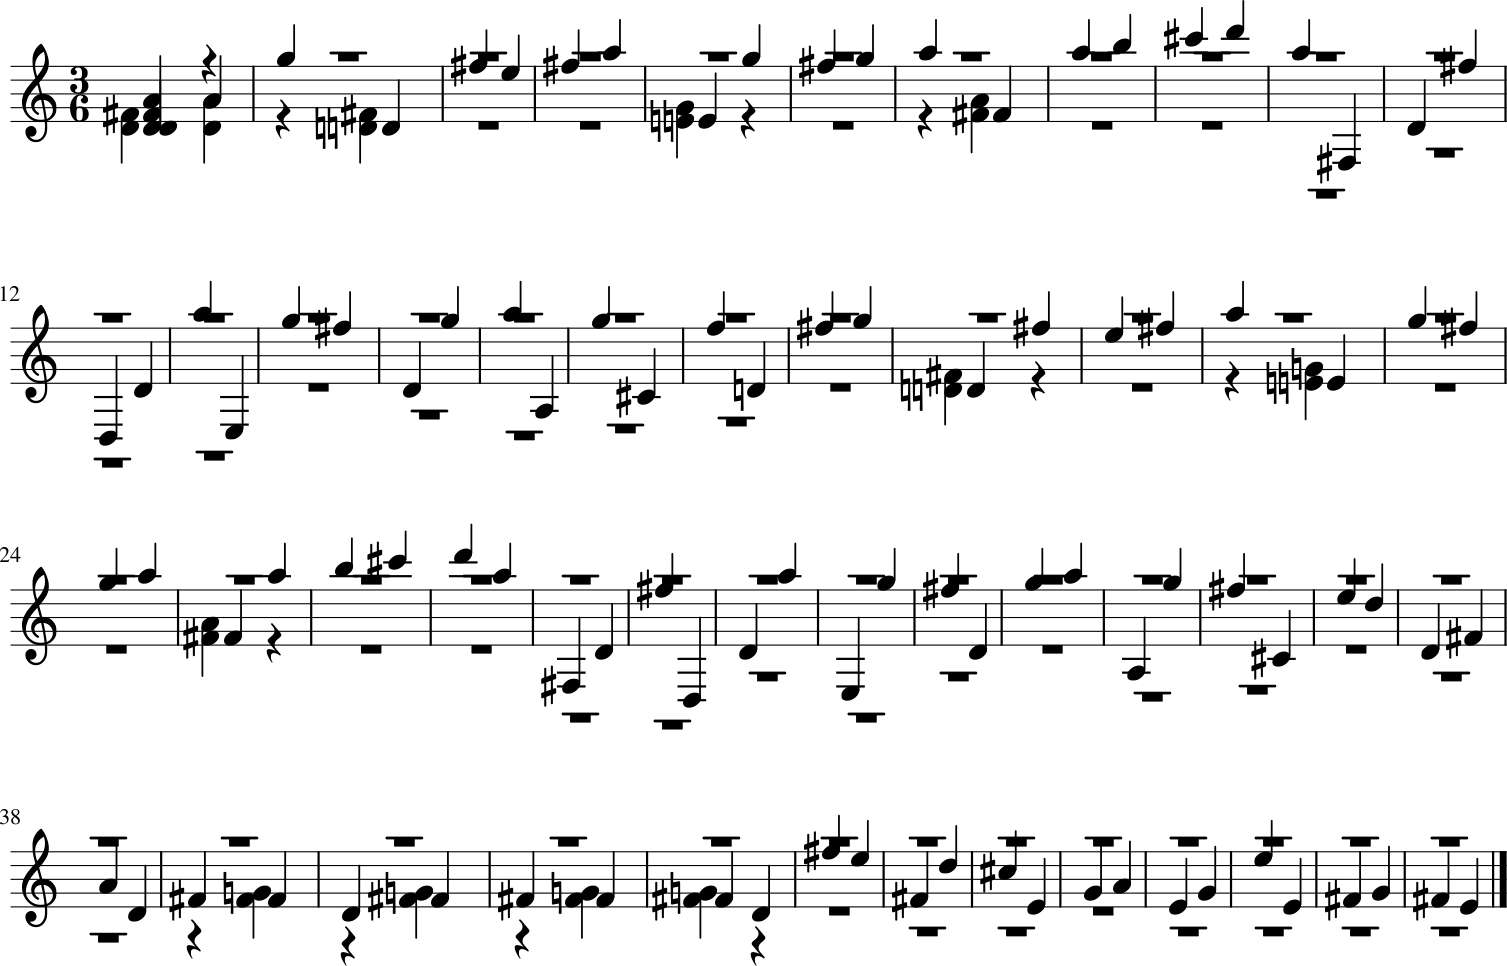

In [129]:
Melody_Snippet.show()

In [130]:
Melody_Snippet.show('midi')

In [131]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 229


In [132]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 243.6768558951965
Most frequent note in Corpus appeared: 2355 times
Least frequent note in Corpus appeared: 1 time


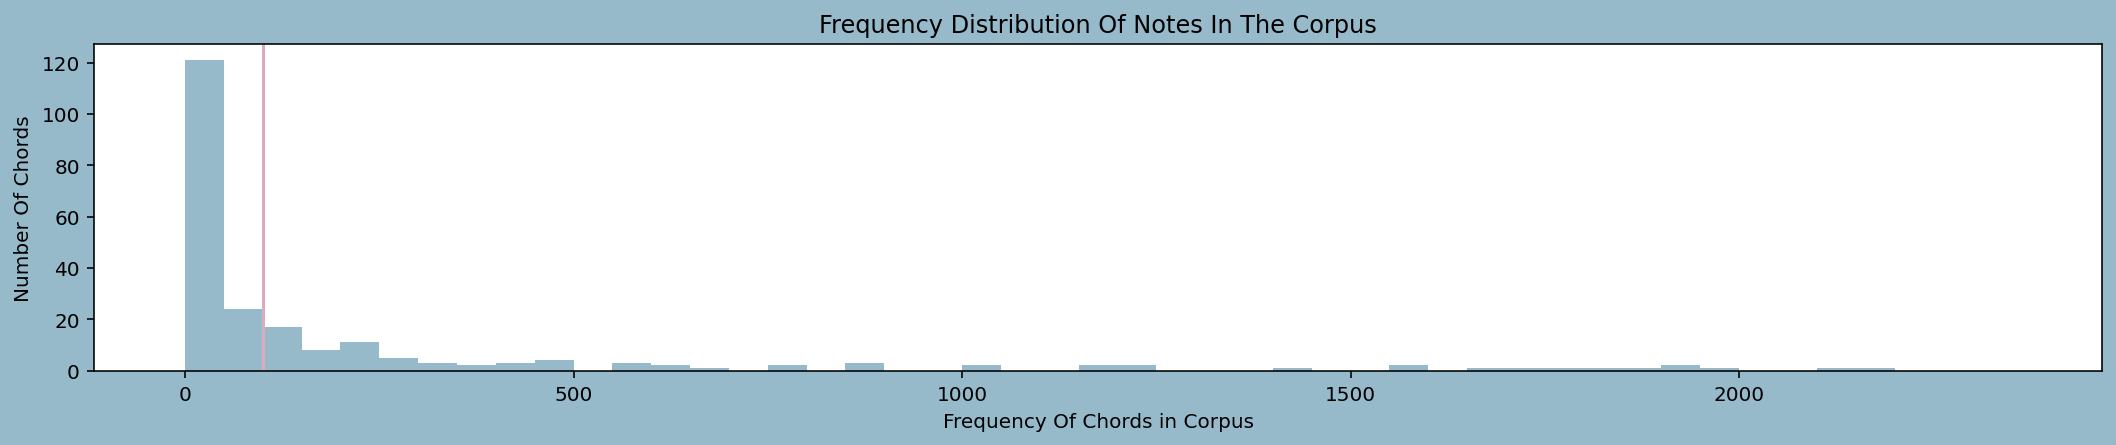

In [133]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

I have decided, I will be taking out the notes that were played less than 100 times. I mean, if Chopin liked them he would have played it a lot more often. So I create a list of rare notes in the next section.

In [75]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 215


In [76]:
#Eleminating the rare notes
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 77572


## Data Preprocessing

In [134]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 55802
Number of unique characters: 229


In [135]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 55762


In [136]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets) 

In [137]:
#Taking out a subset of data to be used as seed
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
length

40

## Model Building

In [139]:
#Initialising the Model
model = tensorflow.keras.Sequential()
#Adding layers
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [140]:
#Model's Summary               
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 40, 512)           1052672   
                                                                 
 dropout_4 (Dropout)         (None, 40, 512)           0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               787456    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 229)               58853     
                                                                 
Total params: 1,964,773
Trainable params: 1,964,773
No

In [147]:
#Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=40)

Epoch 1/40
175/175 [==============================] - 18s 100ms/step - loss: 4.0131 - accuracy: 0.0589
Epoch 2/40
175/175 [==============================] - 17s 99ms/step - loss: 3.9519 - accuracy: 0.0675
Epoch 3/40
175/175 [==============================] - 17s 99ms/step - loss: 3.8725 - accuracy: 0.0792
Epoch 4/40
175/175 [==============================] - 17s 99ms/step - loss: 3.7813 - accuracy: 0.0927
Epoch 5/40
175/175 [==============================] - 17s 100ms/step - loss: 3.6564 - accuracy: 0.1126
Epoch 6/40
175/175 [==============================] - 17s 100ms/step - loss: 3.5262 - accuracy: 0.1350
Epoch 7/40
175/175 [==============================] - 17s 100ms/step - loss: 3.3675 - accuracy: 0.1643
Epoch 8/40
175/175 [==============================] - 17s 100ms/step - loss: 3.2066 - accuracy: 0.1916
Epoch 9/40
175/175 [==============================] - 17s 100ms/step - loss: 3.0660 - accuracy: 0.2210
Epoch 10/40
175/175 [==============================] - 18s 100ms/step - loss

## Evaluating Model

[Text(0.5, 0, 'Epochs')]

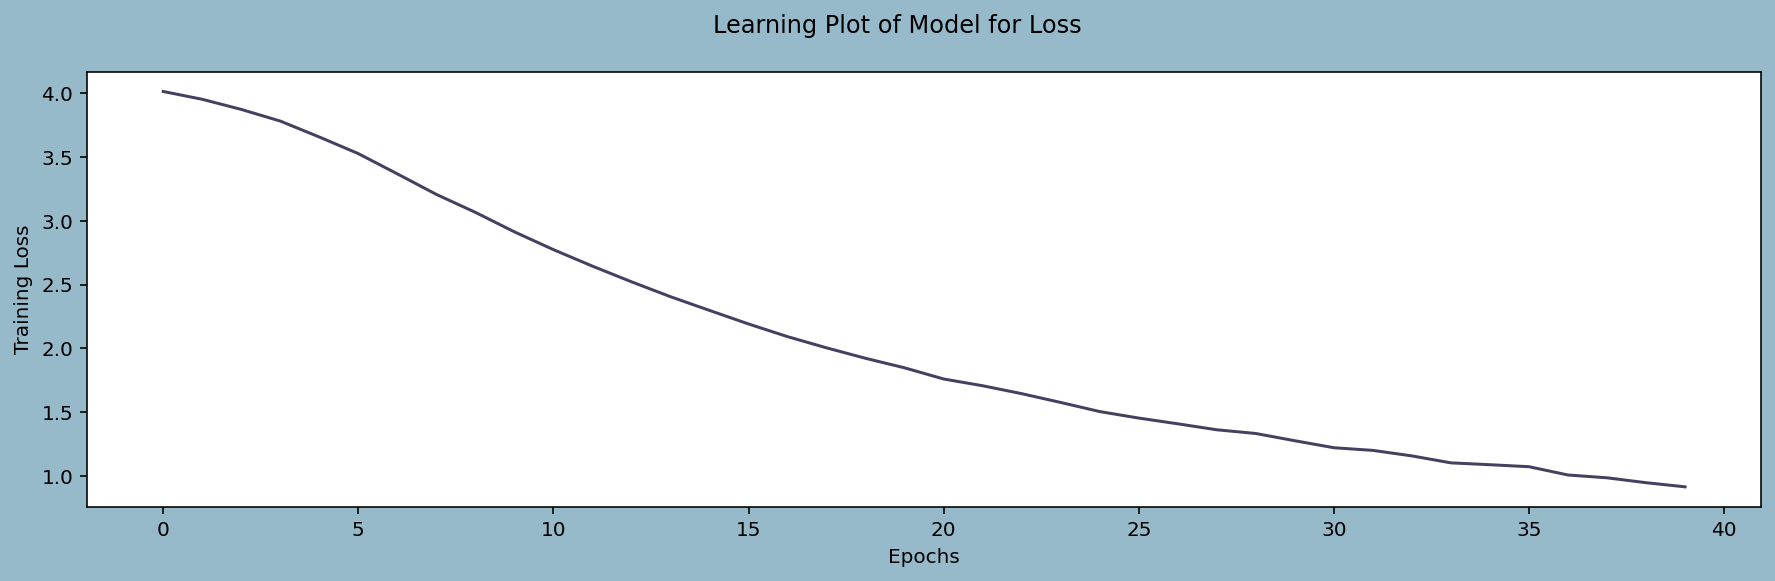

In [148]:
#Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [149]:
def Melody_Generator(Note_Count):
    seed = X_seed[np.random.randint(0,len(X_seed)-1)]
    Music = ""
    Notes_Generated=[]
    for i in range(Note_Count):
        seed = seed.reshape(1,length,1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0 #diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index/ float(L_symb)   
        Notes_Generated.append(index)
        Music = [reverse_mapping[char] for char in Notes_Generated]
        seed = np.insert(seed[0],len(seed[0]),index_N)
        seed = seed[1:]
    #Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music)
    Melody_midi = ms.stream.Stream(Melody)   
    return Music,Melody_midi



#show(Melody)

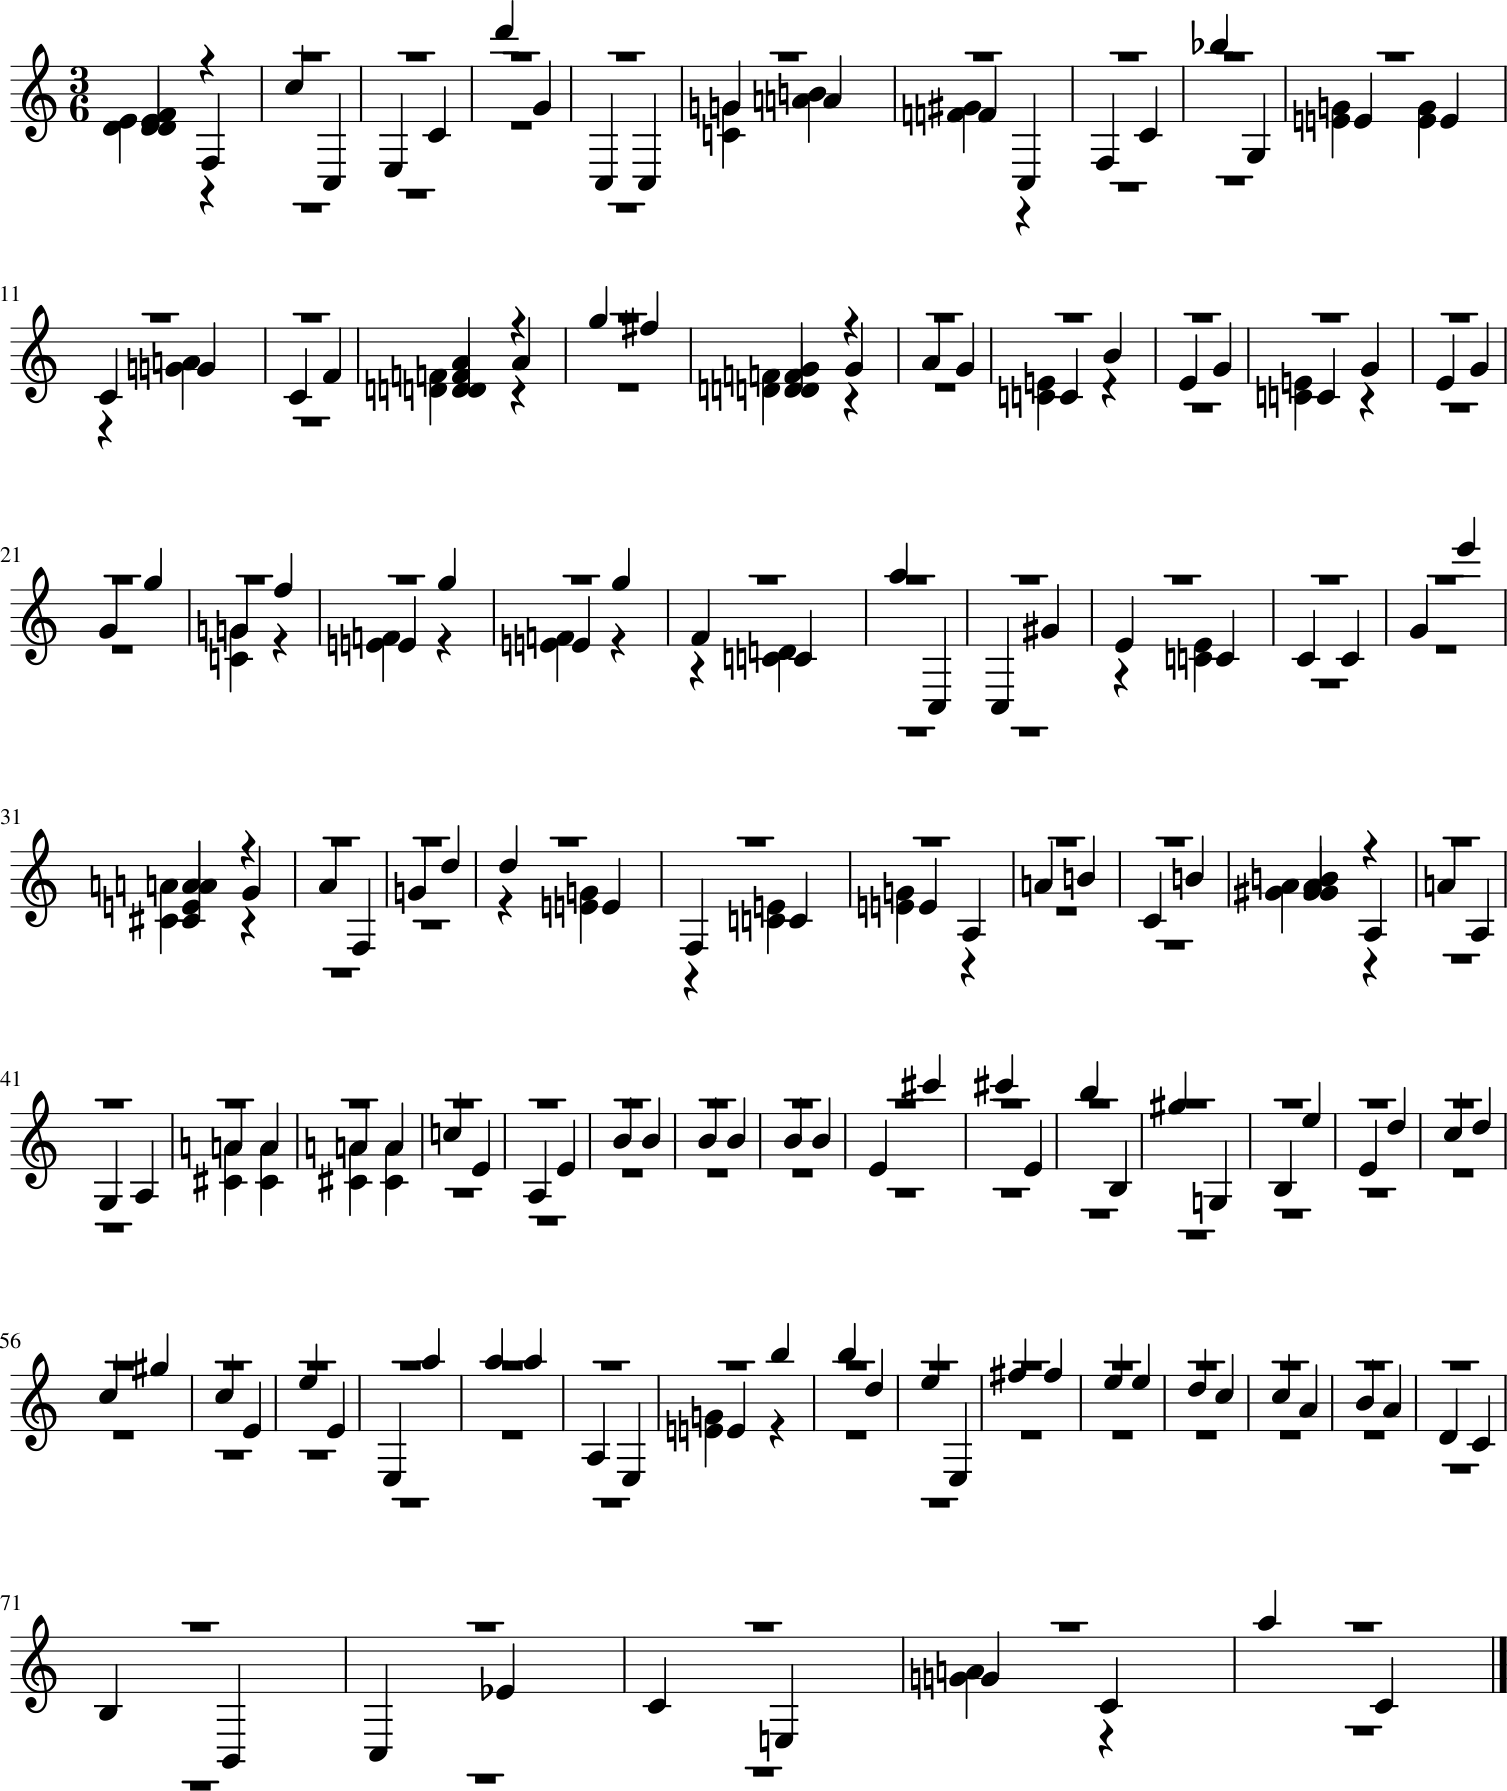

In [151]:
#getting the Notes and Melody created by the model
Music_notes, Melody = Melody_Generator(150)
Melody.show('midi')
Melody.show()

In [ ]:
seed = X_seed[np.random.randint(0,len(X_seed)-1)]